# Programming for Data Analysis - Project 1

## Author: Daria Sep

___

### Overview

This notebook contains a dataset of mental health disorders and death by suicide among Irish adults.

The data has been modeled and synthesised using numpy.random package in Python. The dataset represents a sample of a poulation.

The notebook has been divided into three parts: Research, Simulation and Data Analysis. 

1. **Variables** part contains investigation of the types of the variables involved, their likely distribution, and their relationship with each other.

2. **Simulation** part 

3. **Data Analysis** part contains analysis of the generated database and its comarison with real-life data.



In [1]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Checking available plot styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
# Setting plot style
plt.style.use("bmh")

____

### Introduction

According to 2022 study, 42.5% of Irish adult population suffers from mental health disorders and 11% reportes having attempted suicide at some point in their lifetime. It has also been found that **people experiencing a mental health disorder were five times more likely than those without a disorder to have attempted suicide.** (Maynooth University 2022). In 2016, the suicide rate in Ireland was approximately 9.5/100,000 (CSO 2022).

The surveys by World Health Organization show that the estimated lifetime prevalence of having a mental health disorder varies widely across the surveyed countries, from 47.4% in the United States to 12.0% in Nigeria (Kessler et all 2007). 

The findings of the Irish study are consistent with those of WHO and locate Ireland amongst countires with the highest prevelance of mental health distorders along with France (38%), Columbia (39%), New Zealand (39%) and the USA (47%) (Kessler et all 2007).

The average score of deaths by suicide for Ireland is close to estimated global of 9/100,00 (WHO 2021).

---

### 1. Variables

List of variables, their distribution and relationship with each other.

#### Variables

- ID 
- Age
- Gender 
- Mental Health Disorder
- Death by Suicide

#### ID

*ID* will represent each person in the sample. For the purpose of this project a numbered list of persons will be used. 

In [23]:
# Creating a numbered list of persons - Test

person = []
for i in range (1, 6):
    person.append ("Person {}".format(i))
person

['Person 1', 'Person 2', 'Person 3', 'Person 4', 'Person 5']

#### Age

According to the last available *Census of Population*, the average age of the population in 2016 was 37.4 (CSO 2022). 

Normal distribution allows for negative values and has no bounds. However, based on further research, normal distribution can be used for bounded variables and is an appropriate choice for *age* approximation assuring correct adjustements.

#### Gender

*Gender* is categorised as a qualitative data variable with two possible values: *male* or *female*. According to the 2016 Census of Population, there were 978 males for every 1,000 females in Ireland at that time. This translates to the ratio of male: 49.44% and female: 50.56%.

However, it is closer to the ratio below when looking at adult population only:

- male 48.88%
- female 51.12%

(CSO 2017, CSO 2022)

#### Mental Health Disorder


Almost 1 in 5 adults in Ireland suffers from at lest one mental disorder - approx 42.5% of adult population. (Hyland et al 2022)

*Mental Health Disorder* is a qualitative nominal data type (Kumari 2021).

#### Death by Suicide

As mentioned in the Overview section, the suicide rate in Ireland was approximately 9.5/100,000 in 2016 (CSO 2022).

#### Age vs Gender 

The average age for women was higher than that of men and the averages were 38 and 36.7 respectively. However, age distribution by age group is very similar despite of gender. The biggest group constitutes of ages 25-44 with a 45-64 group at a close second. The smalest group is the 15-24 group followed by over 65s (CSO 2017). 

#### Age vs Mental Health and Suicide Rates

Mental health disorders are more prevelent in younger age groups. A 2022 study on *State of Ireland's mental health* found that people aged 18-24 years were eight times more likely than people aged 55 and over to suffer from a mental health disorder (Maynooth University 2022). 

Hovewer, death by suicide between 2015-2019 was most prevelent in the age older groups. One in 3 deaths from self-harm were by persons aged 45-64, while one in ten by persons aged 65 years and older. (CSO 2022). 

#### Gender vs Mental Health and Suicide Rates

Although women are thrice more likely to suffer from mental health disorders than men, it is men that are more likely than women to die of suicide. Globally, suicide rates in men are just over twice as high as for women (Ritchie at al 2015). In 2016, those rate were even higer for Irish men. They were three times more likely to die of suicide than Irish women (CSO 2022).

Different mental health disorders are more commonly diagnosed in men and women. Men tend toward substance abuse or antisocial disorders, while women are more likely to suffer from with anxiety or depressio (American Psychological Association 2011).

#### Mental Health Disorders vs Sucicide Rates

Five times more poeple who commit suicide suffer from mental health disorder than those who don't. (Maynooth University 2022).

Suffering from any of the 12 disorders listed earlier inclreases risk of dying of suicide. However, the risk vary from dependng on the disorder. 

### Modelling

In [28]:
df = pd.DataFrame(index = None)
rng = np.random.default_rng(seed = 1)

#### ID

In [29]:
person = []
for i in range (2000):
    person.append ("Person {}".format(i+1))

df["person"] = person
df.head()

,person
0,Person 1
1,Person 2
2,Person 3
3,Person 4
4,Person 5


#### Gender

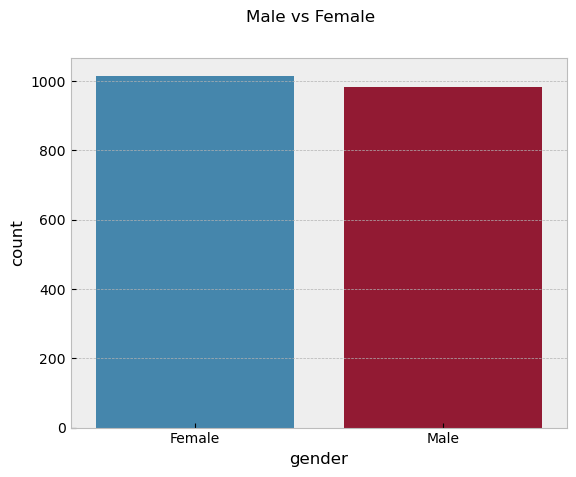

In [30]:
gender_choice = ["Male","Female"]
gender = rng.choice (gender_choice, p = [0.4888, 0.5112], size = 2000)
df["gender"] = gender

# Test
sns.countplot(x = df["gender"])
plt.suptitle ("Male vs Female")
plt.show()

In [31]:
df.head()

,person,gender
0,Person 1,Female
1,Person 2,Female
2,Person 3,Male
3,Person 4,Female
4,Person 5,Male


In [32]:
df["gender"]. value_counts()

Female    1016
Male       984
Name: gender, dtype: int64

Slightly more women than men as per real-data.

#### Age

In [33]:
#SRD based on US numbers (Edwards 2008). I was not able to locate Global or Irish rate.

age = []
for i in range(2000):
    a= np.clip(rng.normal(37.4, 15), 18, 100)
    age.append(int(a))
df["age"] = age


In [34]:
df.head()

,person,gender,age
0,Person 1,Female,22
1,Person 2,Female,39
2,Person 3,Male,61
3,Person 4,Female,36
4,Person 5,Male,28


In [35]:
df.tail()

,person,gender,age
1995,Person 1996,Male,53
1996,Person 1997,Male,50
1997,Person 1998,Female,25
1998,Person 1999,Female,51
1999,Person 2000,Male,58


In [36]:
mean = np.mean (df["age"])
print(mean)

37.598


Synthetic mean close to the mean of 37.4.

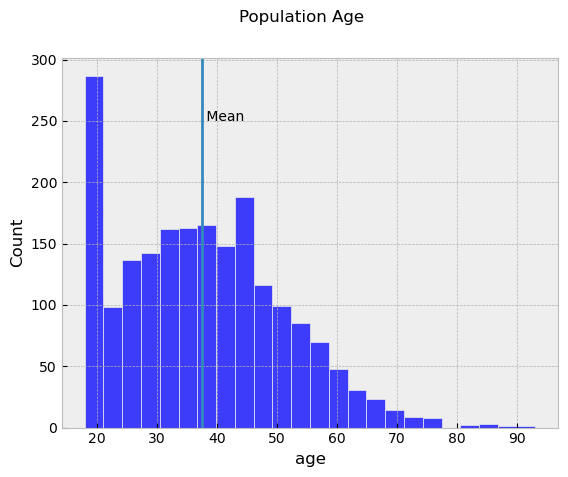

In [61]:
sns.histplot (df["age"])
plt.suptitle ("Population Age")
plt.axvline (mean)
plt.text (x = mean, y = 250, s = " Mean")
plt.show()

#### Mental Health Disorder

In [56]:
disorder_choice = ["Yes", "No"]

disorder = rng.choice (disorder_choice, p = [0.425, 0.575], size = 2000)
df["disorder"] = disorder

df.head ()                  

,person,gender,age,disorder
0,Person 1,Female,22,Yes
1,Person 2,Female,39,No
2,Person 3,Male,61,No
3,Person 4,Female,36,No
4,Person 5,Male,28,No


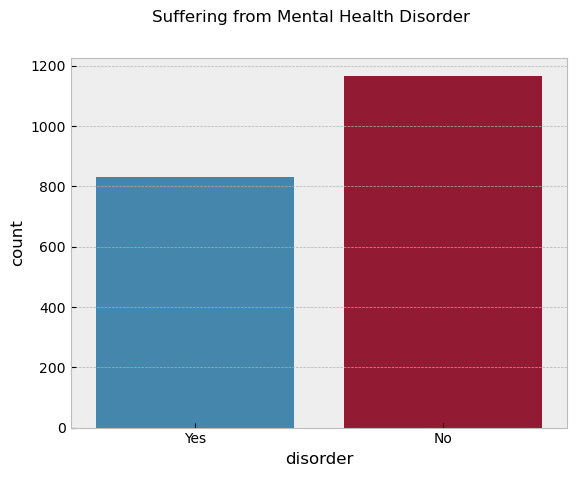

In [59]:
sns.countplot(x = df["disorder"])
plt.suptitle ("Suffering from Mental Health Disorder")
plt.show()

_____

### References

Arnholt, A. (2016). *Passion Driven Statistics.* Online at https://alanarnholt.github.io/PDS-Bookdown2/

American Psychological Association (2021). *Study Finds Sex Differences in Mental Illness.* Online at https://www.apa.org/news/press/releases/2011/08/mental-illness

Central Statistics Office (2017). *Census of Population 2016 - Profile 2 Population Distribution and Movements.* Online at https://www.cso.ie/en/releasesandpublications/ep/p-cp2tc/cp2pdm/

Central Statistics Office (2017). *Census of Population 2016 - Profile 3 An Age Profile of Ireland.* Online at https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/

Central Statistics Office (2022). *EY007 - Population 2011 to 2016*, Census 2016. Online at https://data.cso.ie/

Central Statistics Office (2022). *Suicide Statistics 2019*. Online at https://www.cso.ie/en/releasesandpublications/ep/p-ss/suicidestatistics2019/

Edwards, R.(2008). the Cost of Uncertain Life Span.*J Popul Econ.* Online at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3285408/

Gruebner G, Rapp M, Adli M, Kluge U, Galea S, Heinz A, (2017). Cities and Mental Health. *Deutsches Ärzteblatt International, Vol.114, p.121–127.* Available online at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5374256/

Hyland P, Vallières F, Shevlin M, Bentall R, Butter S, Hartman T, Karatzias T, Martinez A, McBride O, Murphy J, Fox R, (2022). State of Ireland's mental health: findings from a nationally representative survey. *Epidemiology and Psychiatric Sciences, Vol.31.* Available online at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9281488/

Kessler R, Angermayer M, Anthony J, De Graff R, Demyttenaere K, Gasquet I, De Girolamo G, Gluzman S, Gureje O, Haro J, Kawakami N, Karam A, Levinson D, Mora M, Browne M, Posada-Villa J, Stein D, Tsang C, Aguilar-Gaxiola S, Alonso J, Lee S, Heeringa S, Pennell B,  Berglund P, Gruber M, Petukhova M, Chatterji S, Üstün T (2007). Lifetime prevalence and age-of-onset distributions of mental disorders in the World Health Organization's World Mental Health Survey Initiative. *World Psychiatry, vol.6.* Online at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2174588/

Kumari, Riya (2021). *4 Types of Data in Statistics.* Online at https://www.analyticssteps.com/blogs/4-types-data-statistics

Markdown Guide (2022). Markdown Cheat Sheet. Online at https://www.markdownguide.org/cheat-sheet/
Matplotlib (n.d.) *Customizing Matplotlib with style sheets and rcParams* https://matplotlib.org/stable/tutorials/introductory/customizing.html

Maynooth University (2022). *Over 40% of Irish adults have a mental health disorder and one in ten have attempted suicide – MU, NCI and Trinity College research.* Online at https://www.maynoothuniversity.ie/psychology/news/over-40-irish-adults-have-mental-health-disorder-and-one-ten-have-attempted-suicide-mu-nci-and

NumPy (n.d.). *Random Generator.* Online at https://numpy.org/doc/stable/reference/random/generator.html 

Ritchie H, Roser M, and Ortiz-Ospina E (2015). *Suicide.* Online at: 'https://ourworldindata.org/suicide'

Stack Exchange (2015). *If my histogram shows a bell-shaped curve, can I say my data is normally distributed?* Online at https://stats.stackexchange.com/

World Health Organization (2021). *Suicide.* Online at https://www.who.int/news-room/fact-sheets/detail/suicide

World Health Organization (2021). *Suicide Rates.* Online at https://www.who.int/data/gho/data/themes/mental-health/suicide-rates

World Health Organization (2022). *Mental disorders.* Online at https://www.who.int/news-room/fact-sheets/detail/mental-disorders